# Pedicting Student Marks Using Linear regression ML algorithm  

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

importing the dataset

In [12]:
data=pd.read_csv("student.csv")

In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


lets Visualize the given data by drawing graphs the we can came to know the relationship between the variables

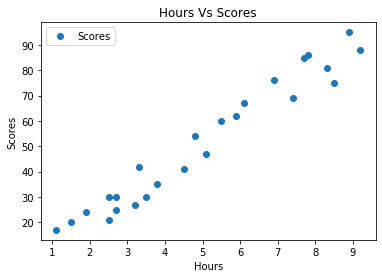

In [14]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

from the graph we observe that dependent variable is linearly dependent on the independent variable

# Preparing the data

Divide the data set into  attributes(inputs) another one is labels(otput). 

In [19]:
X=data.iloc[:,:-1]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [20]:
y=data.iloc[:,1]
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

Now we have to split the data into train and split data.we can implement it by using scikit-learn library 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3)

# Training the data

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Model Trained")

Model Trained


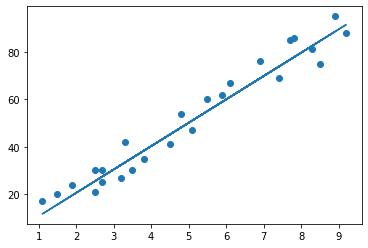

In [25]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predicting the values

In [32]:
y_pred = regressor.predict(X_test)
y_pred

array([82.59012829, 51.08405292, 11.70145871, 76.68273916, 33.36188552,
       58.96057176, 48.13035835, 60.92970147])

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
8,81,82.590128
1,47,51.084053
14,17,11.701459
10,85,76.682739
13,42,33.361886
11,62,58.960572
21,54,48.130358
18,67,60.929701


In [43]:
hours=[[6.5]]
h=np.array(hours)
h.reshape(-1, 1)
prediction=regressor.predict(h)
print("Predicted Score = {}".format(prediction[0]))

Predicted Score = 64.86796089557762


In [46]:
print("testing data accuracy is",regressor.score(X_test,y_test))

testing data accuracy is 0.9205540632762392


In [47]:
print("training data accuracy is",regressor.score(X_train,y_train))

training data accuracy is 0.9576141021780048


# Evalution of the model

In [48]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.363433278850312


# saving the model

In [49]:
import pickle

In [52]:
pickle.dump(regressor, open("marks.pkl",'wb'))